In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src.loading import get_dataset_and_order_function
from src.execution import compute_cuts, compute_tangles, order_cuts, compute_clusters, compute_evaluation
from src.config import load_validate_settings, VALID_PREPROCESSING

args = load_validate_settings('./')
# args.dataset.name = 'knn'

print("Load data\n", flush=True)
xs, ys, G, order_function = get_dataset_and_order_function(args.dataset, args.seed)
nx.is_connected(G)

Load data



False

In [19]:
cuts = dict()
orders = dict()

names = ['kneip', 'local_min_bounded', 'local_min', 'karnig_lin',]
for name in names:
    print(f"Find cuts using {name}", flush=True)
    args.preprocessing.name = name
    all_cuts = compute_cuts(xs.copy(), args.preprocessing)
    
    print("Compute order", flush=True)
    all_cuts, all_orders = order_cuts(all_cuts, order_function)
    
    max_order = np.int(np.ceil(np.max(all_orders)))
    min_order = np.int(np.floor(np.min(all_orders)))
    print(f"\tOrder range: {min_order}--{max_order} \n", flush=True)
    
    cuts[name] = all_cuts
    orders[name] = all_orders

Find cuts using kneip
		 I've found 27 cuts so far
		 I've found 47 cuts so far
		 I've found 70 cuts so far
		 I've found 91 cuts so far
		 I've found 118 cuts so far
		 I've found 149 cuts so far
		 I've found 176 cuts so far
		 I've found 198 cuts so far
		 I've found 215 cuts so far
		 I've found 246 cuts so far
		 I've found 268 cuts so far
		 I've found 290 cuts so far
		 I've found 314 cuts so far
		 I've found 342 cuts so far
		 I've found 376 cuts so far
		 I've found 411 cuts so far
		 I've found 431 cuts so far
		 I've found 457 cuts so far
		 I've found 484 cuts so far
		 I've found 508 cuts so far
Compute order
	Order range: 1--232 

Find cuts using local_min_bounded
Compute order
	Order range: 24--250 

Find cuts using local_min
Compute order
	Order range: 0--277 

Find cuts using karnig_lin
Compute order
	Order range: 0--212 



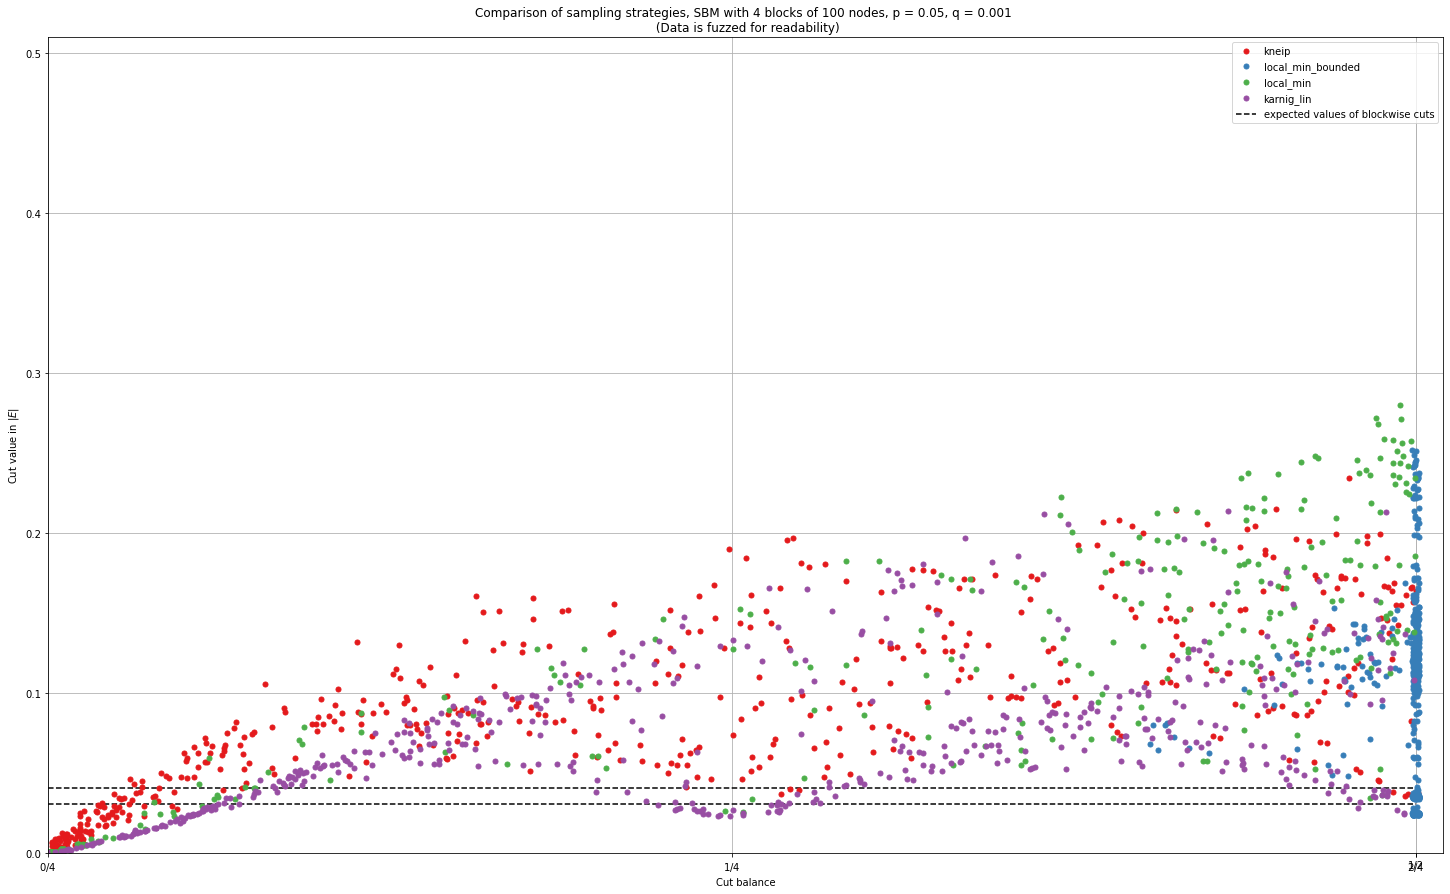

In [20]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(25,15))
cmap = plt.cm.get_cmap('Set1')

for i, name in enumerate(names):
    balance = 0.5 - np.abs(cuts[name].sum(axis=1) / len(G) - 0.5)
    order = orders[name] / len(G.edges)
    xfuzz = (np.random.rand(*balance.shape) - .5) * (1 / len(G))
    yfuzz = (np.random.rand(*balance.shape) - .5) * 0.001
    
    color = np.array(cmap(i))
    
    ax.plot(balance + xfuzz, order + yfuzz, marker='.', ms=10, linestyle='', label=name, color=color)
ax.set(xlabel='Cut balance', ylabel='Cut value in $|E|$')

N = len(G)
nb, p, q = args.dataset.sbm.nb_blocks, args.dataset.sbm.p, args.dataset.sbm.q

ax.hlines([(i*N/nb) * (N - i*N/nb) * q / len(G.edges) for i in range(1, 1 + nb//2)], 0, 0.5, linestyles='dashed', label='expected values of blockwise cuts')

plt.setp(ax, xticks=[i / nb for i in range(1 + nb // 2)] + ([0.5] if nb % 2 == 1 else []),
        xticklabels=[f'${i}/{nb}$' for i in range(1 + nb // 2)] + (['1/2'] if nb % 2 == 1 else []),
        xlim=(0, 0.51), ylim=(0,0.51))

ax.grid(True)
ax.legend()
ax.set_title(f'Comparison of sampling strategies, SBM with {nb} blocks of {N//nb} nodes, p = {p}, q = {q} \n (Data is fuzzed for readability)')

fig.savefig(f'sampling/sbm{nb}blocks{N}nodes{p}p{q}q.png')
plt.show(fig)

2

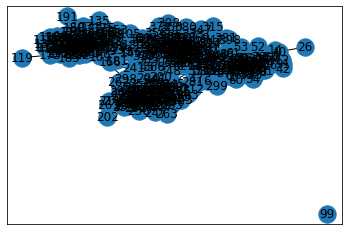

In [25]:
# pos = nx.spectral_layout(G)
# pos = nx.spring_layout(G, pos=pos)
nx.draw_networkx(G)
len(list(nx.connected_components(G)))